# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


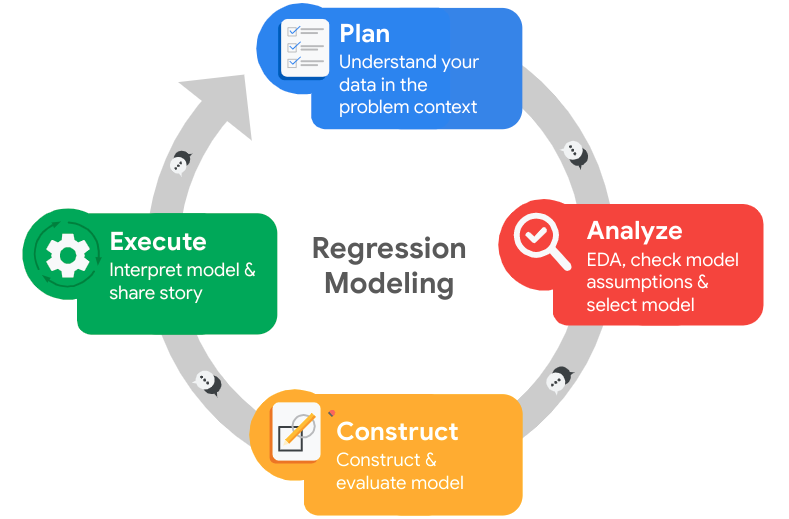

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
HR
- What are you trying to solve or accomplish?
high turn over rate
- What are your initial observations when you explore the data?
HR dataset 
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
Kaggle
- Do you have any ethical considerations in this stage?
yes of course, its confidential informations regarding employees salary and their evaluation.




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data


df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names

df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0=df0.rename(columns={"Work_accident":"work_accident","Department":"department",'average_montly_hours':'average_monthly_hours','time_spend_company':'tenure'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values

df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
duplicated_row = df0[df0.duplicated(keep=False)]

df0[df0.duplicated()].shape

(3008, 10)

In [9]:
# Inspect some rows containing duplicates
  
duplicated_row.sort_values(by=['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure','work_accident','left','promotion_last_5years','department','salary'])



,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1=df0.drop_duplicates(keep="first")


# Display first few rows of new dataframe as needed
df1


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

Check for outliers in the data.

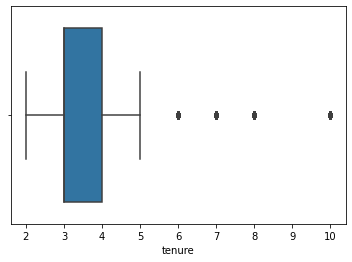

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

sns.boxplot(x=df1['tenure'])





In [12]:

q1=df1['tenure'].quantile(0.25)
q3=df1['tenure'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(iqr*1.5)
lower_limit=q1-(iqr*1.5)

upper_limit,lower_limit

(5.5, 1.5)

In [13]:
# Determine the number of rows containing outliers

df1[(df1['tenure']>5.5)|(df1['tenure']<1.5)]



,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
linear
- What do you observe about the distributions in the data?
dono
- What transformations did you make with your data? Why did you chose to make those decisions?
remove duplication
- What are some purposes of EDA before constructing a predictive model?
make the data more useful
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
dono
- Do you have any ethical considerations in this stage?
no




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed

df1['left'].value_counts(),

# Get percentages of people who left vs. stayed
df1['left'].value_counts(normalize=True)


0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

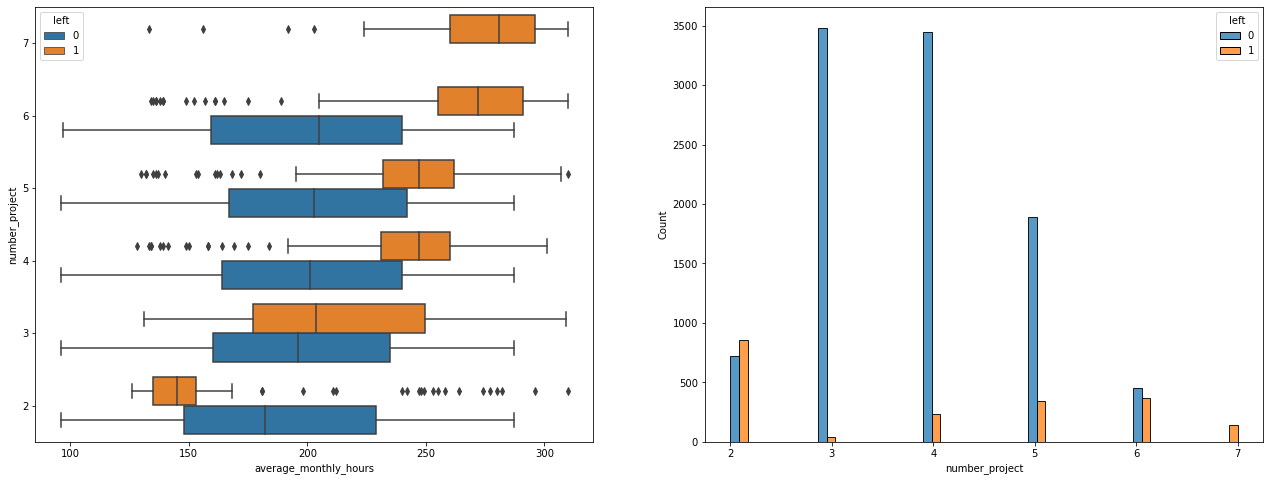

In [15]:
# Create a plot as needed

fig,ax=plt.subplots(1,2,figsize=(22,8))

sns.boxplot(data=df1,x='average_monthly_hours',y="number_project",hue="left",orient='h',ax=ax[0])
ax[0].invert_yaxis()

sns.histplot(data=df1,x="number_project",hue="left",multiple="dodge",ax=ax[1])



In [16]:
# Create a plot as needed

df1[df1['number_project']==7]['left'].value_counts()


1    145
Name: left, dtype: int64

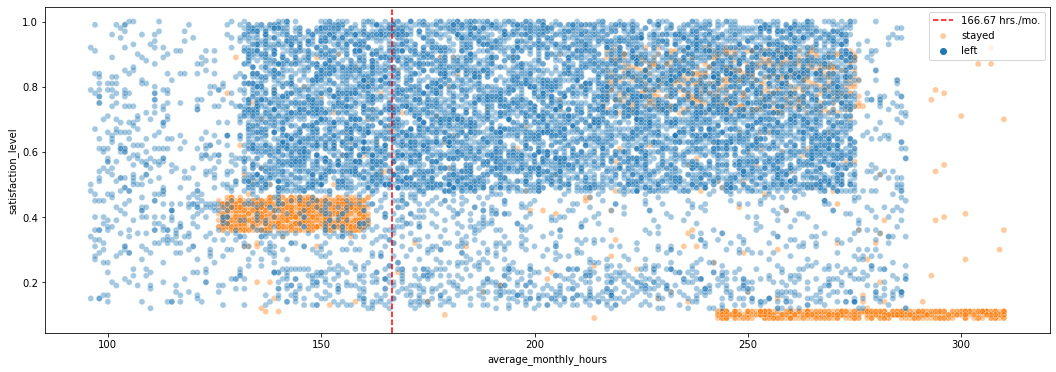

In [17]:
# Create a plot as needed
#working hour vs satisfaction level

plt.figure(figsize=(18,6))
sns.scatterplot(data=df1,x='average_monthly_hours',y="satisfaction_level",hue="left",alpha=0.4)

plt.axvline(x=166.67,ls='--',color='red')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])


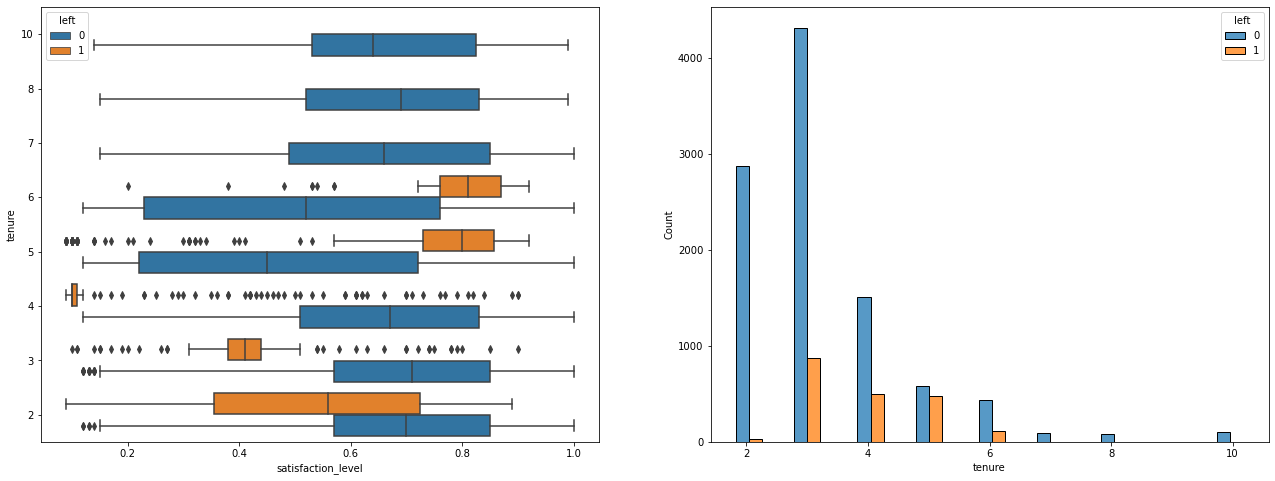

In [18]:
# Create a plot as needed
#satisfaction levels by tenure.

fig,ax=plt.subplots(1,2,figsize=(22,8))

sns.boxplot(data=df1,x='satisfaction_level',y="tenure",hue="left",orient='h',ax=ax[0])
ax[0].invert_yaxis()

sns.histplot(data=df1,x="tenure",hue="left",multiple="dodge",shrink=5,ax=ax[1])


In [19]:
# Create a plot as needed
# mean and median satisfaction scores of employees who left and those who didn't.

df1.groupby(['left']).agg(['mean','median'])['satisfaction_level']



,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


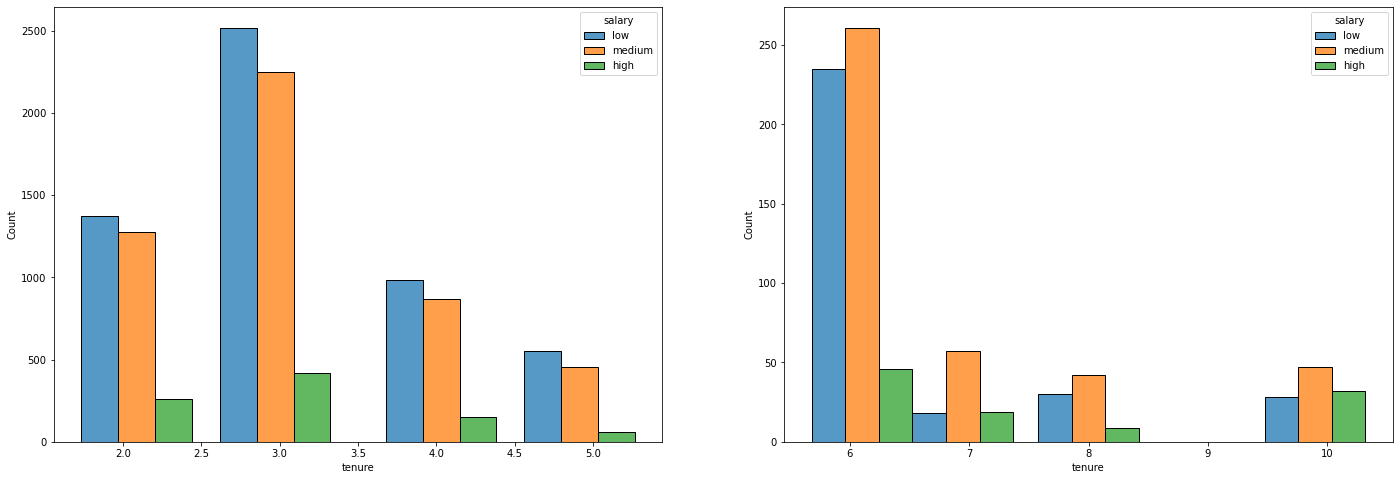

In [20]:
# Create a plot as needed
#salary levels for different tenures.

tenure_5 = df1[df1['tenure']<=5]
tenure_10 = df1[df1['tenure']>5]
fig,ax=plt.subplots(1,2,figsize=(24,8))
sns.histplot(data=tenure_5,x="tenure",hue="salary",multiple="dodge",hue_order=['low','medium','high'],shrink=4,ax=ax[0])
sns.histplot(data=tenure_10,x="tenure",hue="salary",multiple="dodge",hue_order=['low','medium','high'],shrink=4,ax=ax[1])




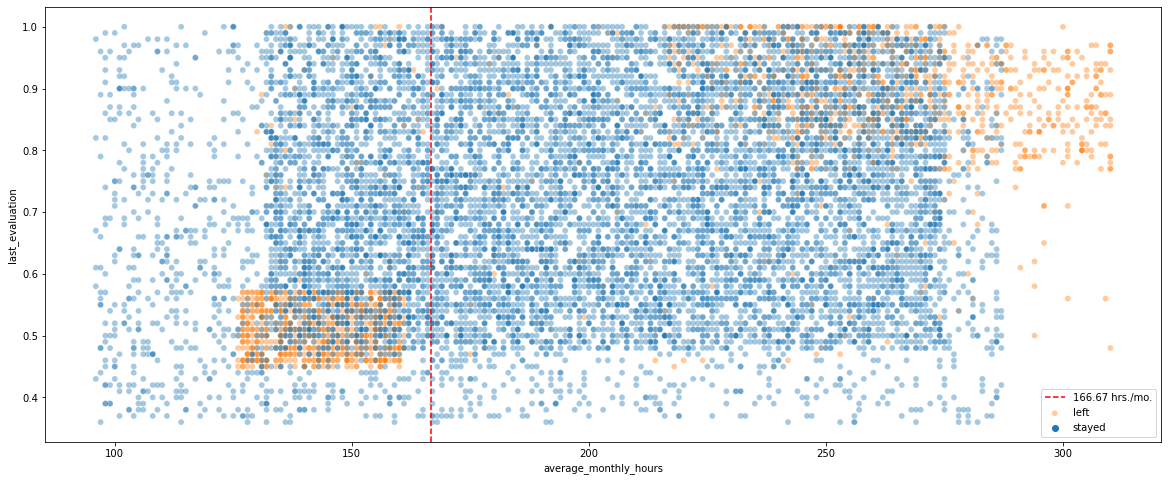

In [21]:
# Create a plot as needed
#correlation between working long hours and receiving high evaluation scores.
#You could create a scatterplot of average_monthly_hours versus last_evaluation.

plt.figure(figsize=(20,8))
sns.scatterplot(data=df1,x="average_monthly_hours",y='last_evaluation',hue="left",alpha=0.4)
plt.axvline(x=166.67,ls='--',color='red')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])



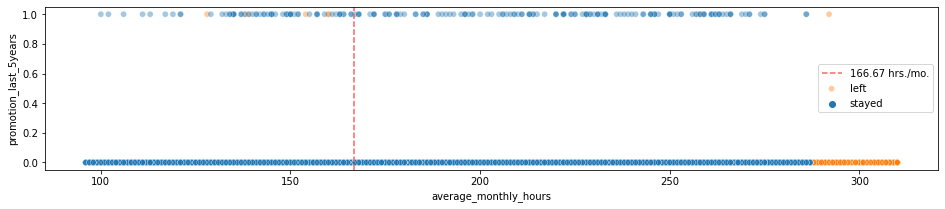

In [22]:
# Create a plot as needed
#who worked very long hours were promoted in the last five years.

plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

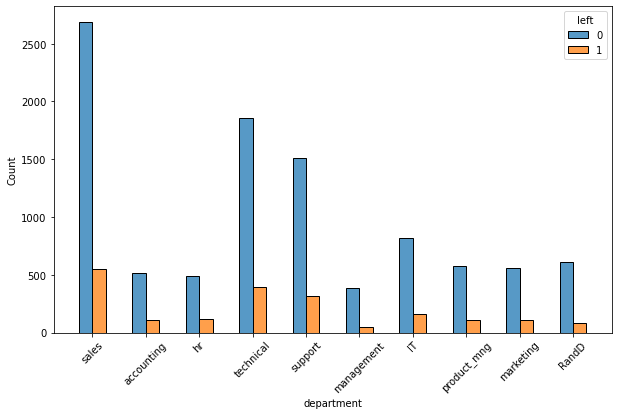

In [23]:
#employees who left are distributed across departments.
plt.figure(figsize=(10,6))
sns.histplot(data=df1,x="department",hue="left",multiple="dodge",shrink=0.5,discrete=1)
plt.xticks(rotation='45')

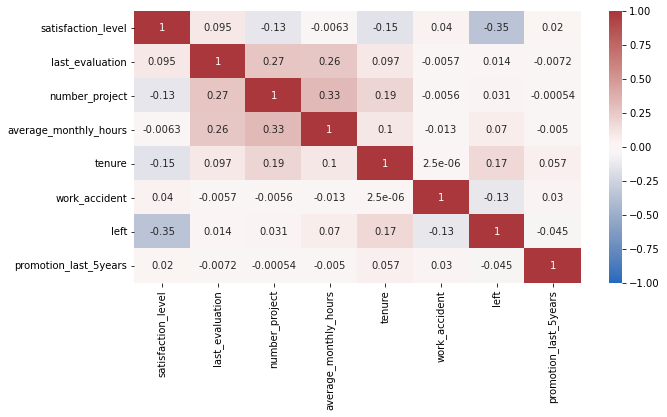

In [24]:
#Lastly, you could check for strong correlations between variables in the data.

plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),vmin=-1,vmax=1,cmap=sns.color_palette("vlag", as_cmap=True),annot=True)


### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
logistic
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?

- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

binary

### Identify the types of models most appropriate for this task.

logistic regression

### Modeling

Add as many cells as you need to conduct the modeling process.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [26]:
# encode the non-numeric variables. There are two: department and salary.
#department is a categorical variable, which means you can dummy it for modeling.
#salary is categorical too, but it's ordinal. There's a hierarchy to the categories, 
#so it's better not to dummy this column, but rather to convert the levels to numbers, 0–2.

df_enco=df1.copy()

df_enco['salary']=df_enco['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes

df_enco=pd.get_dummies(df_enco,drop_first=False)

df_enco

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0


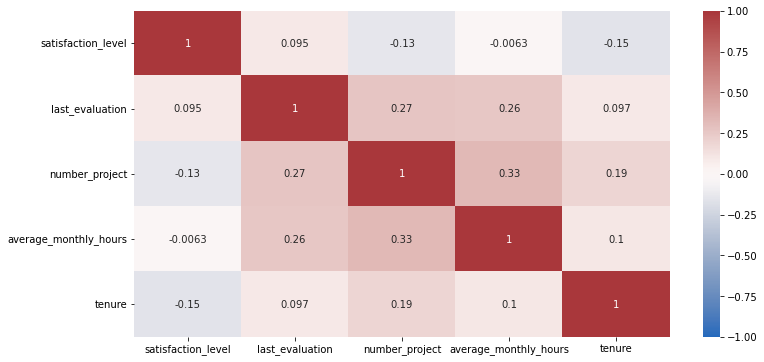

In [27]:
#Create a heatmap to visualize how correlated variables are. 
#Consider which variables you're interested in examining correlations between.

plt.figure(figsize=(12,6))
sns.heatmap(df_enco[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(),vmin=-1,vmax=1,cmap=sns.color_palette("vlag", as_cmap=True),annot=True)



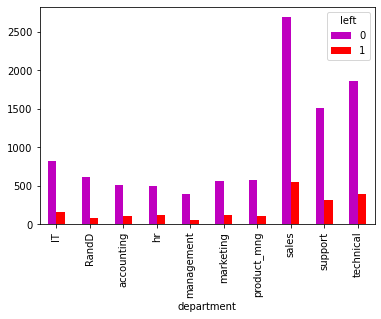

In [28]:
#Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.


pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')

In [29]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable

df_logreg=df_enco[(df_enco['tenure']>=lower_limit)&(df_enco['tenure']<=upper_limit)]

In [30]:
#Isolate the outcome variable, which is the variable you want your model to predict.

y=df_logreg['left']

#Select the features you want to use in your model. Consider which variables will help you predict the outcome variable, left.

x=df_logreg.drop('left',axis=1)

In [31]:
#Split the data into training set and testing set. Don't forget to stratify based on the values in y, since the classes are unbalanced.

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)

In [32]:
#Construct a logistic regression model and fit it to the training dataset.

clf = LogisticRegression(random_state=42, max_iter=500).fit(x_train,y_train)

In [33]:
#Test the logistic regression model: use the model to make predictions on the test set.

y_pred = clf.predict(x_test)

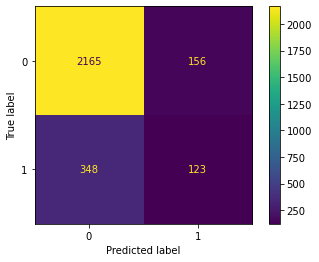

In [34]:
#Create a confusion matrix to visualize the results of the logistic regression model.

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm= confusion_matrix(y_test,y_pred,labels=clf.classes_)

disp = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)

disp.plot(values_format='')

In [35]:
#Create a classification report that includes precision, recall, f1-score, and 
#accuracy metrics to evaluate the performance of the logistic regression model.

#Check the class balance in the data. In other words, check the value counts in the left column. 
#Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [36]:
# Create classification report for logistic regression model

from sklearn.metrics import classification_report

target_labels=['stayed','left']

print(classification_report(y_test,y_pred,target_names=target_labels))


              precision    recall  f1-score   support

      stayed       0.86      0.93      0.90      2321
        left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



In [37]:
#tree-based model

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)

#Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

#initial tree model

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV


tree= DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over

params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch

tree_cv=GridSearchCV(tree,params,scoring=scoring,cv=4,refit='roc_auc')

# Fit the model with train dataset

tree_cv.fit(x_train,y_train)


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [38]:
#Identify the optimal values for the decision tree parameters

# Check best parameters

tree_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [39]:
#Identify the best AUC score achieved by the decision tree model on the training set.

tree_cv.best_score_

0.9738070859906354

In [40]:
#Next, you can write a function that will help you extract all the scores from the grid search.

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [41]:
# Get all CV scores

tree_cv_results=make_results('Tree_CV',tree_cv,'auc')

tree_cv_results

,model,precision,recall,F1,accuracy,auc
0,Tree_CV,0.959115,0.912839,0.935275,0.978747,0.973807


In [42]:
#Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

#random forest model

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)

#Construct a RF model and set up cross-validated grid-search to exhuastively search for the best model parameters.

#initial RF model


from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over

params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch

rf_cv=GridSearchCV(rf,params,scoring=scoring,cv=4,refit='roc_auc')

# Fit the model with train dataset

rf_cv.fit(x_train,y_train)


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [43]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [44]:
rf_cv.best_score_

0.9801962654493814

In [45]:
rf_cv_results=make_results('rf_CV',rf_cv,'auc')

rf_cv_results

,model,precision,recall,F1,accuracy,auc
0,rf_CV,0.968225,0.908588,0.937377,0.979583,0.980196


In [46]:
results = pd.concat([tree_cv_results,rf_cv_results],axis=0)

results

,model,precision,recall,F1,accuracy,auc
0,Tree_CV,0.959115,0.912839,0.935275,0.978747,0.973807
0,rf_CV,0.968225,0.908588,0.937377,0.979583,0.980196


In [47]:
#Next, you can evaluate the final model on the test set.

#Define a function that gets all the scores from a model's predictions.

from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score

def get_scores(model_name:str, model, X_test_data, y_test_data):
    
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [48]:
#Now use the best performing model to predict on the test set.

get_scores('rf_test',rf_cv,x_test,y_test)

,model,precision,recall,f1,accuracy,AUC
0,rf_test,0.982063,0.929936,0.955289,0.985315,0.963245


In [50]:
#You could proceed by dropping satisfaction_level and creating a new feature that roughly captures whether an employee is overworked. 
#You could call this new feature overworked. It will be a binary variable.

df2 = df_enco.drop("satisfaction_level",axis=1)



In [51]:
df2

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0
11996,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11997,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11998,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0


In [52]:
# Create `overworked` column. For now, it's identical to average monthly hours.

df2['overworked'] = df2['average_monthly_hours']

print(df2['average_monthly_hours'].max())
print(df2['average_monthly_hours'].min())

310
96


In [53]:
# Define `overworked` as working > 175 hrs/week

df2['overworked']=(df2['overworked']>175).astype(int)

df2

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0,1
11996,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0,1
11997,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0,1
11998,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0


In [54]:
# Drop the `average_monthly_hours` column

df2= df2.drop('average_monthly_hours',axis=1)

df2

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.55,3,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0,1
11996,0.95,5,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0,1
11997,0.54,3,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0,1
11998,0.65,3,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0


In [69]:
# Isolate the outcome variable

y=df2['left']

x=df2.drop('left',axis=1)

In [73]:
#Split the data into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.25,random_state=0)

# Instantiate tree 2 model

tree2 = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over

params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch

tree2_cv=GridSearchCV(tree2,params,scoring=scoring,cv=4,refit='roc_auc')

# Fit the model with train dataset

tree2_cv.fit(x_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [76]:
tree2_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [77]:
tree2_cv.best_score_

0.9586752505340426

In [80]:
# Get all CV scores

tree2_cv_results=make_results('tree2_cv',tree2_cv,"auc")

print(tree_cv_results)
print(tree2_cv_results)

     model  precision    recall        F1  accuracy       auc
0  Tree_CV   0.959115  0.912839  0.935275  0.978747  0.973807
      model  precision    recall        F1  accuracy       auc
0  tree2_cv   0.856693  0.903553  0.878882  0.958523  0.958675


In [82]:
%%time
rf2 = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over

params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch

rf2_cv=GridSearchCV(rf2,params,scoring=scoring,cv=4,refit='roc_auc')

# Fit the model with train dataset

rf2_cv.fit(x_train,y_train)


CPU times: user 7min 33s, sys: 1.03 s, total: 7min 34s
Wall time: 7min 35s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [83]:
#compare tree2 with rf2

rf2_cv_results=make_results('rf2_cv',rf2_cv,"auc")

print(tree2_cv_results)
print(rf2_cv_results)


      model  precision    recall        F1  accuracy       auc
0  tree2_cv   0.856693  0.903553  0.878882  0.958523  0.958675
    model  precision    recall        F1  accuracy      auc
0  rf2_cv   0.866758  0.878754  0.872407  0.957411  0.96481


In [84]:
# Get predictions on test data

get_scores('rf2_test',rf2_cv,x_test,y_test)

,model,precision,recall,f1,accuracy,AUC
0,rf2_test,0.870406,0.903614,0.8867,0.961641,0.938407


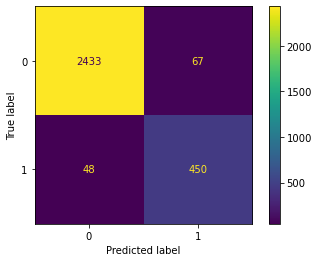

In [85]:
# Generate array of values for confusion matrix

y_pred = rf2_cv.best_estimator_.predict(x_test)

cm= confusion_matrix(y_test,y_pred,labels=rf2_cv.classes_)

disp = ConfusionMatrixDisplay(cm,display_labels=rf2_cv.classes_)

disp.plot(values_format='')

[Text(1920.8076923076924, 1261.9285714285713, 'number_project <= 2.5\ngini = 0.277\nsamples = 8993\nvalue = [7500, 1493]\nclass = stayed'),
 Text(865.6153846153846, 1067.7857142857142, 'last_evaluation <= 0.575\ngini = 0.496\nsamples = 1192\nvalue = [543, 649]\nclass = left'),
 Text(314.7692307692308, 873.6428571428571, 'overworked <= 0.5\ngini = 0.351\nsamples = 819\nvalue = [186, 633]\nclass = left'),
 Text(114.46153846153847, 679.5, 'last_evaluation <= 0.445\ngini = 0.244\nsamples = 732\nvalue = [104, 628]\nclass = left'),
 Text(57.23076923076923, 485.3571428571429, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = stayed'),
 Text(171.6923076923077, 485.3571428571429, 'tenure <= 2.5\ngini = 0.168\nsamples = 692\nvalue = [64, 628]\nclass = left'),
 Text(114.46153846153847, 291.2142857142858, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = stayed'),
 Text(228.92307692307693, 291.2142857142858, 'tenure <= 3.5\ngini = 0.125\nsamples = 673\nvalue = [45, 628]\nclass = left'),
 Text(

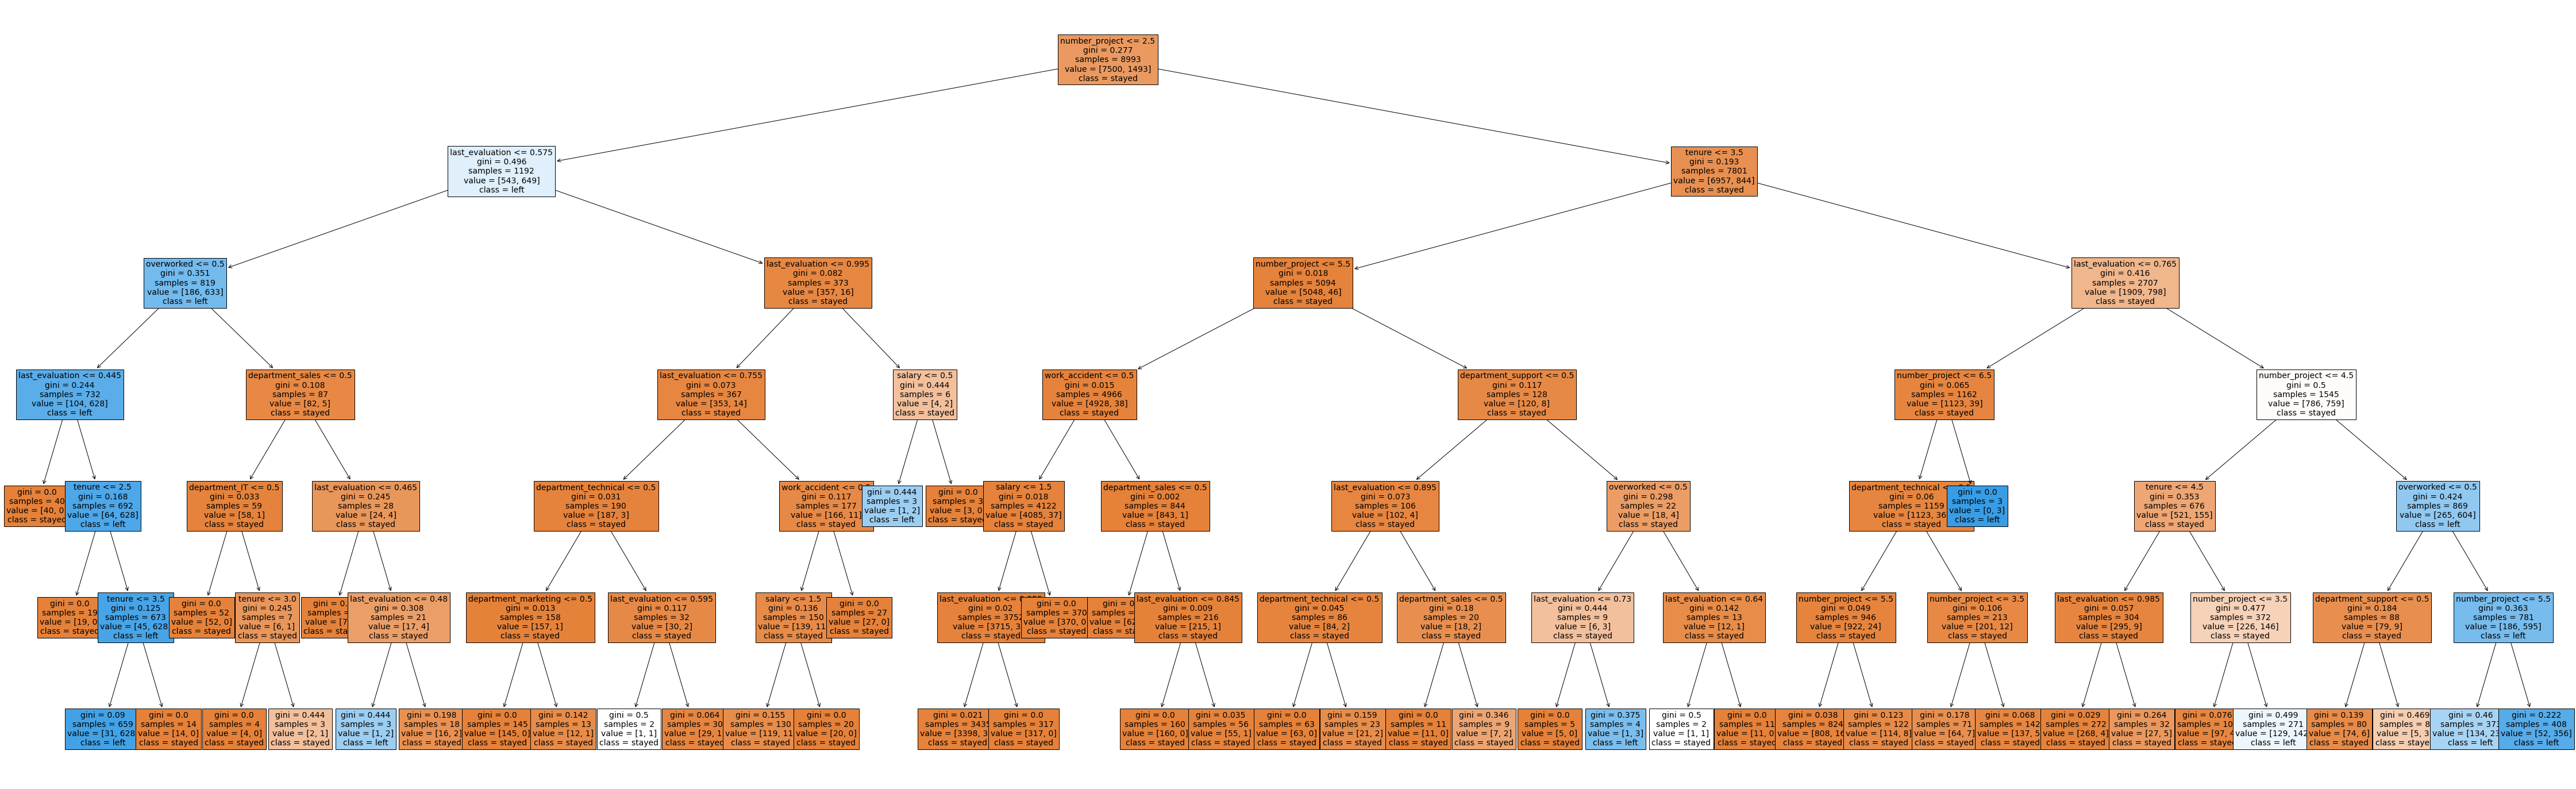

In [89]:
# Plot the tree

plt.figure(figsize=(80,25))

plot_tree(tree2_cv.best_estimator_,max_depth=6,fontsize=14,feature_names=x.columns,
         class_names={0:'stayed',1:'left'},filled=True)



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [92]:
#compute importances tree2

tree2_importances = pd.DataFrame(tree2_cv.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=x.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


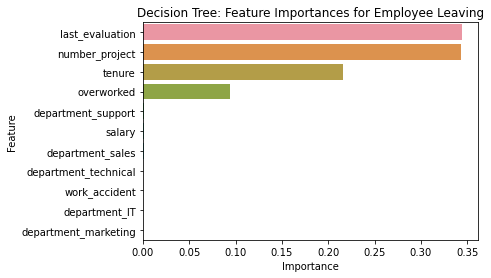

In [93]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [94]:
#compute importances rf2

rf2_importances = pd.DataFrame(rf2_cv.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=x.columns
                                )
rf2_importances = rf2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
rf2_importances = rf2_importances[rf2_importances['gini_importance'] != 0]
rf2_importances

,gini_importance
last_evaluation,0.359494
number_project,0.356801
tenure,0.199109
overworked,0.080984
salary,0.000644
department_sales,0.000612
department_support,0.000578
department_technical,0.000414
department_IT,0.000291
work_accident,0.000276


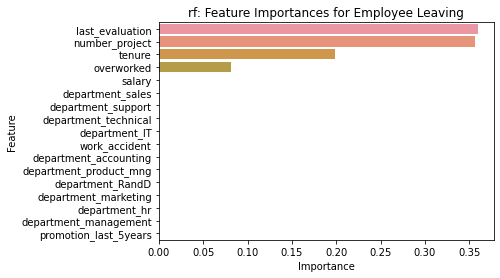

In [95]:
sns.barplot(data=rf2_importances, x="gini_importance", y=rf2_importances.index, orient='h')
plt.title("rf: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
last evaluation,number of projects,tenure,overworked and salary are the top 5 reasons why employees quiting.
- What business recommendations do you propose based on the models built?
further investigate evaluation matrics and make sure reward those employees with high scores.
- What potential recommendations would you make to your manager/company?
revise company reward policy and increament policy.
- Do you think your model could be improved? Why or why not? How?
the model with 0.964 auc score,its consider good enough but can still add on new variables to further study.
- Given what you know about the data and the models you were using, what other questions could you address for the team?
further investigate reason why there are employees who work under average working hours. possible its a bias or outliers.
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
HR data from kaggle.
- Do you have any ethical considerations in this stage?
yes ensure information only circulate within my team.



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic Regression
The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

tree model
After conducting feature engineering, the decision tree model achieved AUC of 95.8%, precision of 85.7%, recall of 90.4%, f1-score of 87.9%, and accuracy of 95.8%, on the test set. The random forest modestly outperformed the decision tree model


### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

Cap the number of projects that employees can work on.
Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.
Next Steps

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when last_evaluation is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.